In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Data importation

In [36]:
data = pd.read_csv("netflix_customer_survey.csv")
data.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


### Data Preperation

In [37]:
X = data.drop(columns=['selected', 'customerid'])
y = data['selected']
X.head()

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show
2,4,15,Disney,one_per_day
3,5,10,HBO,one_per_day
4,1,20,Soccer,one_per_show


Some EDA

In [38]:
y.unique()

array([1, 0], dtype=int64)

In [40]:
X['NumberAccounts'].unique()

array([2, 6, 4, 5, 1, 3], dtype=int64)

In [41]:
X['price'].unique()

array([10,  8, 15, 20, 12, 18], dtype=int64)

In [42]:
X['ExtraContent'].unique()

array(['HBO', 'Marvel', 'Disney', 'Soccer', 'less content',
       'Prime originals'], dtype=object)

In [43]:
X['ads'].unique()

array(['one_per_day', 'one_per_show', 'none'], dtype=object)

In [44]:
# One-hot encode the features
X_dummy = pd.get_dummies(X, columns=X.columns)
X_dummy.head(1)

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


### Logistic Regression Model

In [46]:
model = sm.Logit(y, X_dummy).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.649426
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2979
Method:                           MLE   Df Model:                           20
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                 0.06307
Time:                        18:32:32   Log-Likelihood:                -1948.3
converged:                       True   LL-Null:                       -2079.4
Covariance Type:            nonrobust   LLR p-value:                 3.781e-44
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7047   1.73e+06  -4.06e-07      1.000    -3.4e+06     3.4e+06
NumberAccounts_2                -0.0733   1.73e+06  -4.23e-08      1.000    -3.4e+06     3.4e+06
NumberAccounts_3                -0.0219   1.73e+06  -1.26e-08      1.000    -3.4e+06     3.4e+06
NumberAccounts_4                 0.1252   1.73e+06   7.22e-08      1.000    -3.4e+06     3.4e+06
NumberAccounts_5                 0.1318   1.73e+06    7.6e-08      1.000    -3.4e+06     3.4e+06
NumberAccounts_6                 0.4976   1.73e+06   2.87e-07      1.000    -3.4e+06     3.4e+06
price_8                          0.2972   1.41e+06    2.1e-07      1.000   -2.77e+06    2.77e+06
price_10                         0.2207   1.41e+06   1.56e-07      1.000   -2.77e+06    2.77e+06
price_12                         0.2020   1.41e+06   1.43e-07      1.000   -2.77e+06    2.77e+06
price_15                         0.0197   1.41e+06    1.4e-08      1.000   -2.77e+06    2.77e+06
price_18                        -0.1030   1.41e+06   -7.3e-08      1.000   -2.77e+06    2.77e+06
price_20                        -0.6819   1.41e+06  -4.83e-07      1.000   -2.77e+06    2.77e+06
ExtraContent_Disney              0.2282   2.69e+06    8.5e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_HBO                 0.2270   2.69e+06   8.45e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_Marvel              0.1452   2.69e+06   5.41e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_Prime originals     0.1279   2.69e+06   4.76e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_Soccer             -0.2048   2.69e+06  -7.63e-08      1.000   -5.26e+06    5.26e+06
ExtraContent_less content       -0.5689   2.69e+06  -2.12e-07      1.000   -5.26e+06    5.26e+06
ads_none                         0.2082   1.59e+06   1.31e-07      1.000   -3.12e+06    3.12e+06
ads_one_per_day                  0.1092   1.59e+06   6.87e-08      1.000   -3.12e+06    3.12e+06
ads_one_per_show                -0.3627   1.59e+06  -2.28e-07      1.000   -3.12e+06    3.12e+06
================================================================================================
"""

### Visualization

In [15]:
result_df = pd.DataFrame({"Param_names": model.params.keys(),
                          "Partworth": model.params.values,
                          "P_values":model.pvalues}).reset_index(drop=True)

In [16]:
result_df.head()

,Param_names,Partworth,P_values
0,NumberAccounts_1,-2.721298e+12,0.04912
1,NumberAccounts_2,-2.721298e+12,0.04912
2,NumberAccounts_3,-2.721298e+12,0.04912
3,NumberAccounts_4,-2.721298e+12,0.04912
4,NumberAccounts_5,-2.721298e+12,0.04912


In [24]:
result_df = result_df.sort_values(by='Partworth')

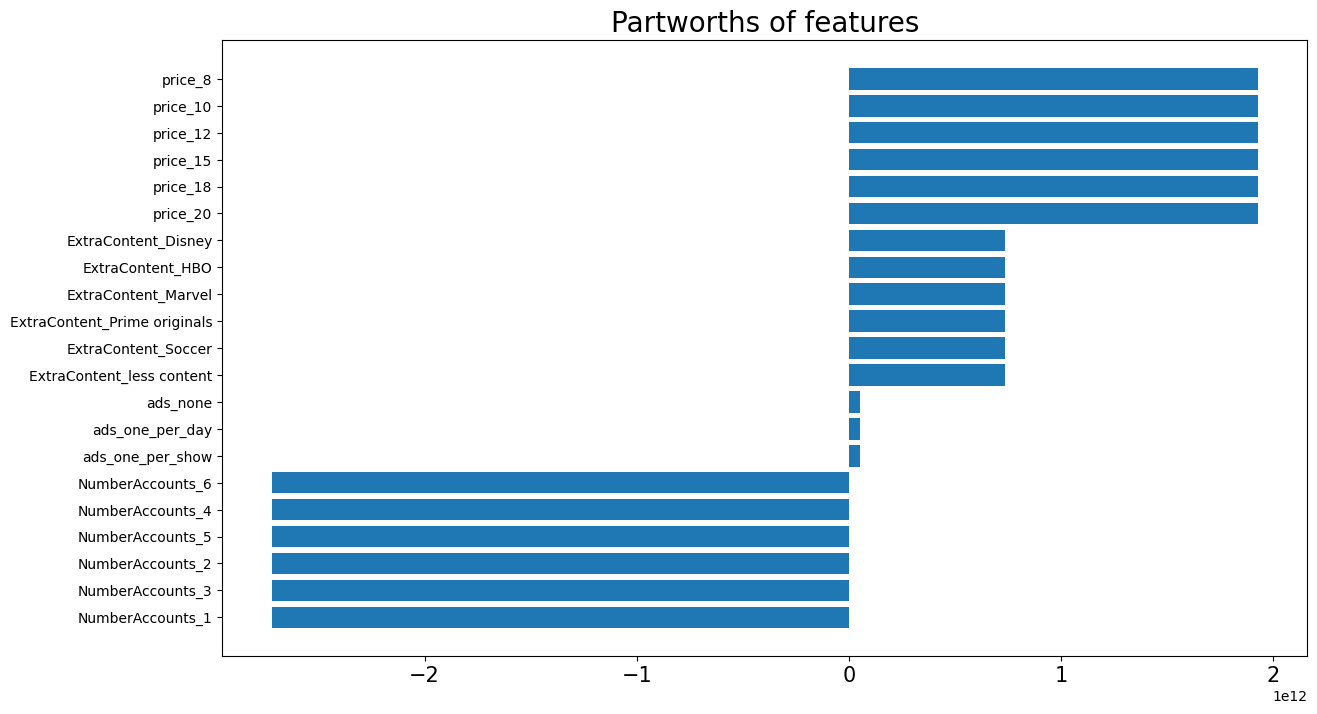

In [25]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.title('Partworths of features', fontsize=20)
values = result_df['Partworth']
plt.barh(result_df['Param_names'], values)
plt.xticks(fontsize=15)
plt.show()